In [1]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta

import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft


# client = Client(threads_per_worker=1)
client = Client(threads_per_worker=2)
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 48
Total threads: 96,Total memory: 384.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40209,Workers: 48
Dashboard: /proxy/8787/status,Total threads: 96
Started: Just now,Total memory: 384.00 GiB
Comm: tcp://127.0.0.1:43433,Total threads: 2
Dashboard: /proxy/38103/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:46105,


In [2]:
## Load density data for near the shelf

full20 = tt.collect_data(
    "full-20",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
notide20 = tt.collect_data(
    "notide-20",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
smooth20 = tt.collect_data(
    "smooth-20",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
beamless20 = tt.collect_data(
    "beamless-20",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
beamless10 = tt.collect_data(
    "beamless-10",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
full10 = tt.collect_data(
    "full-10",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
smooth10 = tt.collect_data(
    "smooth-10",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").persist()
# notide10 = tt.collect_data(
#     "notide-10",
#     rawdata = ["rho"],
#     timerange = (10000,20000)
# ).sel(xb = slice(120,250),zl = slice(0,1000)).sel(yb = 0,method = "nearest").mean("time").persist()

data = {
    "full-20":full20,
    "notide-20":notide20,
    "smooth-20":smooth20,
    "beamless-20":beamless20,
    "full-10":full10,
    # "notide-10":notide10,
    "smooth-10":smooth10,
    "beamless-10":beamless10,
}
# tmpstorage = os.getenv('PBS_JOBFS')
# for i in data:
#     data[i].to_netcdf(tmpstorage + f"/{i}.nc")



loading rho...	done.
loading rho...	done.
loading rho...	

2025-01-13 15:35:24,903 - distributed.worker - WARNING - Compute Failed
Key:       ('concatenate-open_dataset-rho-getitem-e37f0d81469e1e5c519ffe638f6e22df', 25, 0, 6, 0)
State:     executing
Function:  getter
args:      (ImplicitToExplicitIndexingAdapter(array=CopyOnWriteArray(array=LazilyIndexedArray(array=<xarray.backends.netCDF4_.NetCDF4ArrayWrapper object at 0x1493edeaed40>, key=BasicIndexer((slice(None, None, None), slice(None, None, None), slice(None, None, None), slice(None, None, None)))))), (slice(0, 360, None), slice(0, 15, None), slice(0, 3, None), slice(0, 63, None)))
kwargs:    {}
Exception: "KeyError('rho')"
Traceback: '  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/dask/array/core.py", line 118, in getter\n    c = np.asarray(c)\n  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/core/indexing.py", line 573, in __array__\n    return np.asarray(self.get_duck_array(), dtype=dtype)

done.
loading rho...	

Exception ignored in: <function CachingFileManager.__del__ at 0x14bb97e420e0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


done.
loading rho...	

Exception ignored in: <function CachingFileManager.__del__ at 0x14bb97e420e0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


done.
loading rho...	

Exception ignored in: <function CachingFileManager.__del__ at 0x14bb97e420e0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


done.
loading rho...	

Exception ignored in: <function CachingFileManager.__del__ at 0x14bb97e420e0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


done.


Exception ignored in: <function CachingFileManager.__del__ at 0x14bb97e420e0>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID


In [30]:
notide20 = tt.collect_data(
    "notide-20",
    rawdata = ["rho"],
    timerange = (10000,36000)
).sel(xb = slice(0,250),yb = slice(-100,50)).isel(zl = slice(0,15)).mean("time").load()

loading rho...	done.


KeyError: 'rho'

In [21]:
expts = ["full-20","notide-20","smooth-20","beamless-20","beamless-10","full-10","smooth-10"]
for expt in expts:
    ext = ""
    if "beamless" in expt:
        ext = "_noridge"
    if "smooth" in expt:
        ext = "_flattened"


    rawbathy = xr.open_dataset(f"/g/data/nm03/ab8992/ttide-inputs/full-{expt.split('-')[1]}/topog{ext}.nc")
    if "lon" not in rawbathy.dims:
        latlon = xr.open_dataset(f"/g/data/nm03/ab8992/ttide-inputs/full-{expt.split('-')[1]}/topog_flattened.nc")
        rawbathy = rawbathy.assign_coords(
            {"lon":latlon.lon,"lat":latlon.lat}
        )
    rawbathy = rawbathy.rename({"lon":"xh","lat":"yh"})
    


    bathy = tt.beamgrid(
        rawbathy
    )
    if os.path.exists(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc"):
        os.remove(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc")
    bathy.to_netcdf(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc")

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: gadi-cpu-clx-0368
--------------------------------------------------------------------------


In [24]:
full20["bathy"]

<xarray.DataArray 'bathy' (xb: 33)> Size: 264B
dask.array<getitem, shape=(33,), dtype=float64, chunksize=(33,), chunktype=numpy.ndarray>
Coordinates:
  * xb       (xb) float64 264B 120.0 124.0 128.0 132.0 ... 240.0 244.0 248.0
    yb       float64 8B 0.0
    zi       float64 8B ...
    lon      (xb) float64 264B dask.array<chunksize=(33,), meta=np.ndarray>
    lat      (xb) float64 264B dask.array<chunksize=(33,), meta=np.ndarray>

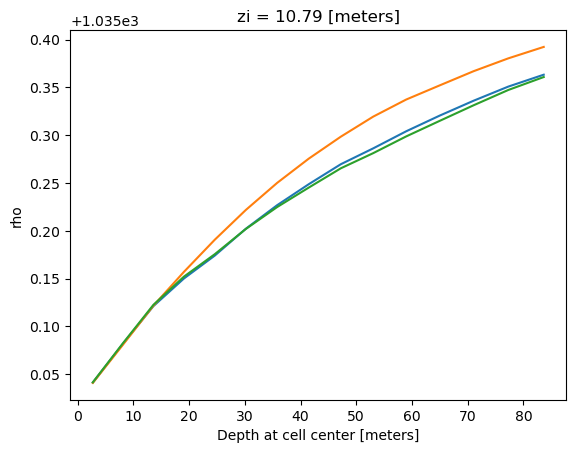

In [31]:
full20.where(full20["bathy"] < 500).mean("yb").mean("xb").rho.plot()
# notide20.where(full20["bathy"] < 500).mean("yb").mean("xb").rho.plot()
smooth20.where(full20["bathy"] < 500).mean("yb").mean("xb").rho.plot()
beamless20.where(full20["bathy"] < 500).mean("yb").mean("xb").rho.plot()

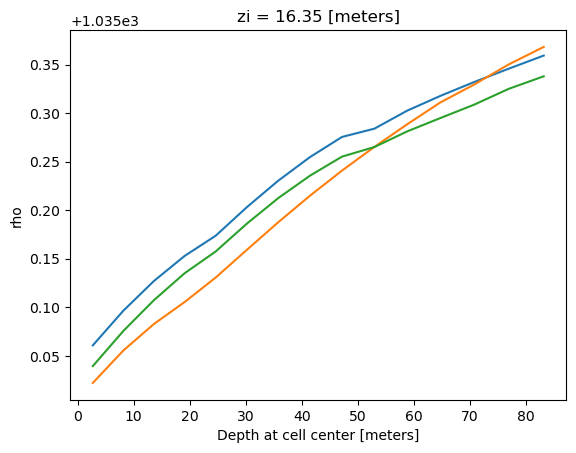

In [32]:
full10.where(full10["bathy"] < 500).mean("yb").mean("xb").rho.plot()
# notide10.where(full10["bathy"] < 500).mean("yb").mean("xb").rho.plot()
smooth10.where(full10["bathy"] < 500).mean("yb").mean("xb").rho.plot()
beamless10.where(full10["bathy"] < 500).mean("yb").mean("xb").rho.plot()

<Figure size 640x480 with 0 Axes>

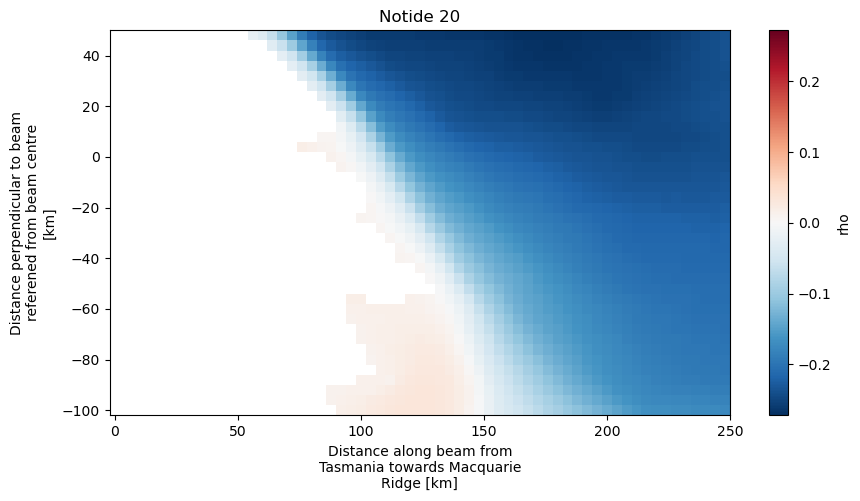

<Figure size 640x480 with 0 Axes>

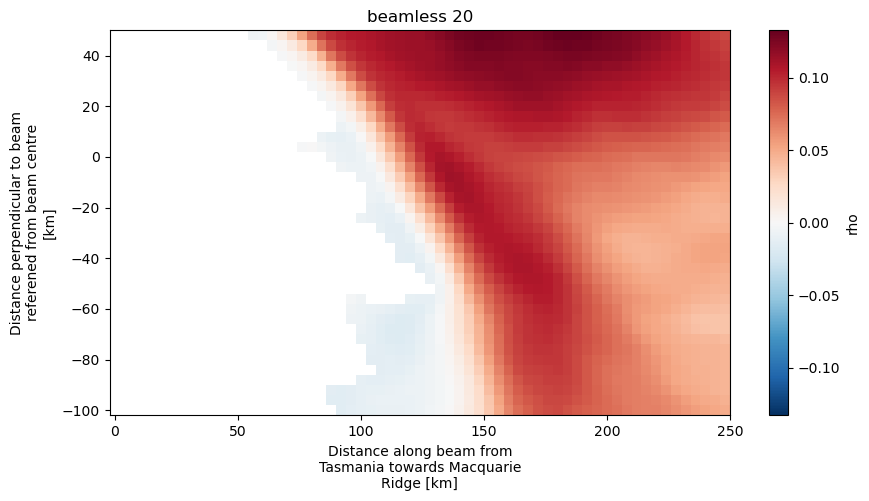

<Figure size 640x480 with 0 Axes>

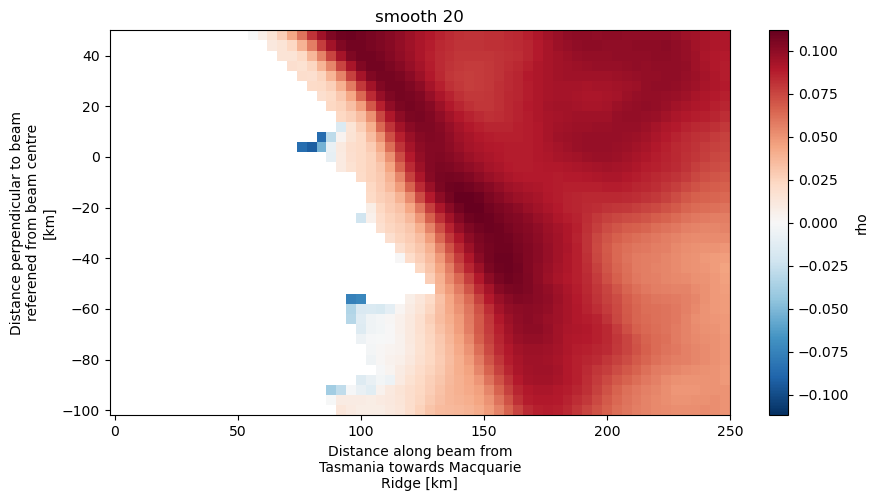

<Figure size 640x480 with 0 Axes>

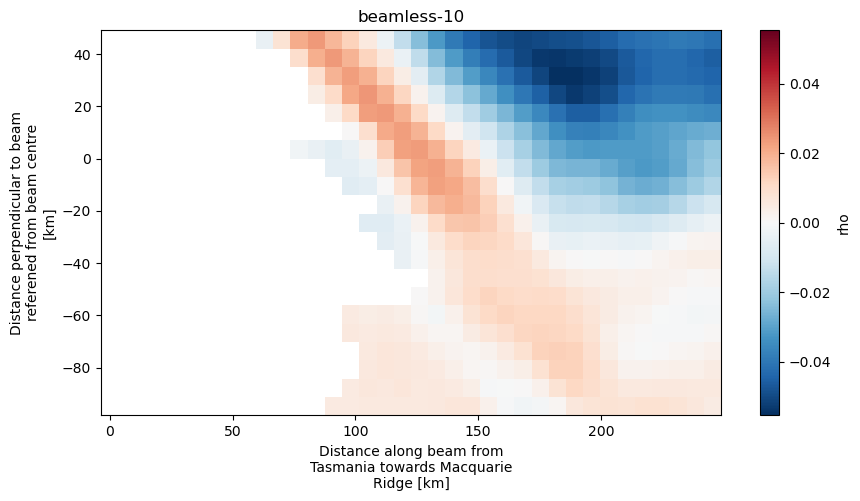

<Figure size 640x480 with 0 Axes>

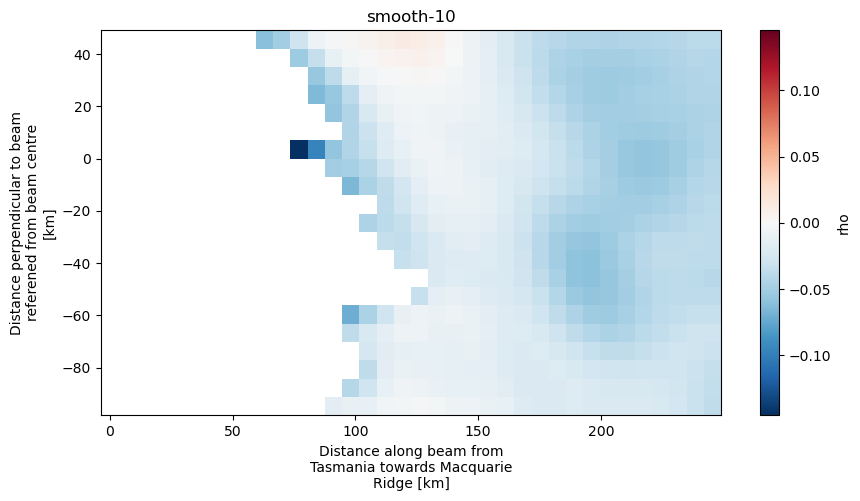

<Figure size 640x480 with 0 Axes>

In [8]:
def plot_anomaly(d1,d2,bathy):
    fig,ax = plt.subplots(1,1,figsize=(10,5))
    cutoff = 150
    d = (d2 - d1)

    shelf = d.where(bathy * -1 < cutoff,np.nan)
    notshelf = d.where(bathy * -1 >= cutoff,np.nan)

    cmap1 = plt.cm.RdBu_r
    cmap2 = plt.cm.PiYG
    cmap1.set_bad(color = "gray",alpha = 0)
    cmap2.set_bad(color = "gray",alpha = 0)

    shelf.plot(ax = ax,cmap = cmap1)
    notshelf.plot(ax = ax,cmap = cmap2,add_colorbar = False)
    ax.invert_yaxis()

    tt.plot_topo(ax,-1 * bathy)

plot_anomaly(data["full-20"].rho,data["notide-20"].rho,data["full-20"].bathy)
plt.title("Notide 20")
plt.figure()

plot_anomaly(data["full-20"].rho,data["beamless-20"].rho,data["full-20"].bathy)
plt.title("beamless 20")
plt.figure()

plot_anomaly(data["full-20"].rho,data["smooth-20"].rho,data["full-20"].bathy)
plt.title("smooth 20")
plt.figure()

plot_anomaly(data["full-10"].rho,data["beamless-10"].rho,data["full-10"].bathy)
plt.title("beamless-10")
plt.figure()

plot_anomaly(data["full-10"].rho,data["smooth-10"].rho,data["full-10"].bathy)
plt.title("smooth-10")
plt.figure()

In [ ]:
zl = full20.zl.values
d_zl = np.diff(np.insert(full20.zl.values, 0, 0))
zl[39]

403.911815626739

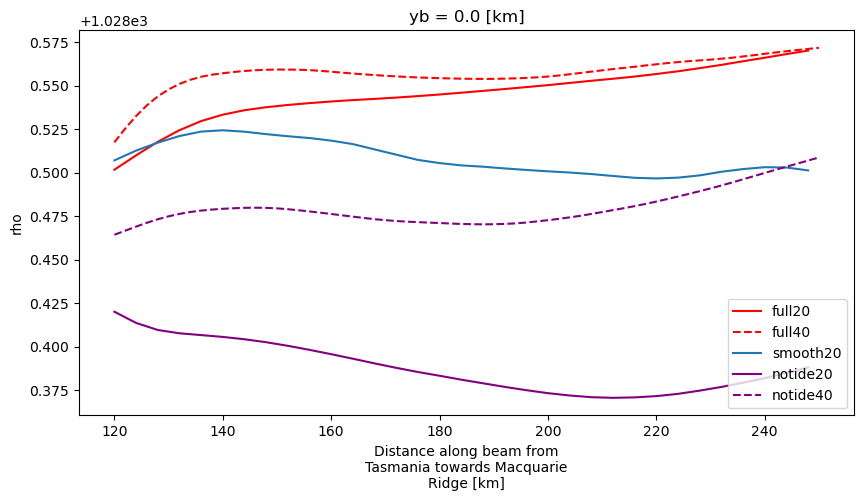

In [36]:
zmax = 40
fig,ax = plt.subplots(1,1,figsize=(10,5))
(full20.isel(zl = slice(0,zmax)).integrate("zl").rho / zl[zmax - 1]).plot(ax = ax,label = "full20",color = "red")
(full40.isel(zl = slice(0,zmax)).integrate("zl").rho / zl[zmax - 1]).plot(ax = ax,label = "full40",color = "red",linestyle  = "--")
(smooth20.isel(zl = slice(0,zmax)).integrate("zl").rho / zl[zmax - 1]).plot(ax = ax,label = "smooth20")
(notide20.isel(zl = slice(0,zmax)).integrate("zl").rho / zl[zmax - 1]).plot(ax = ax,label = "notide20",color = "purple")
(notide40.isel(zl = slice(0,zmax)).integrate("zl").rho / zl[zmax - 1]).plot(ax = ax,label = "notide40",color = "purple",linestyle = "--")
ax.legend()



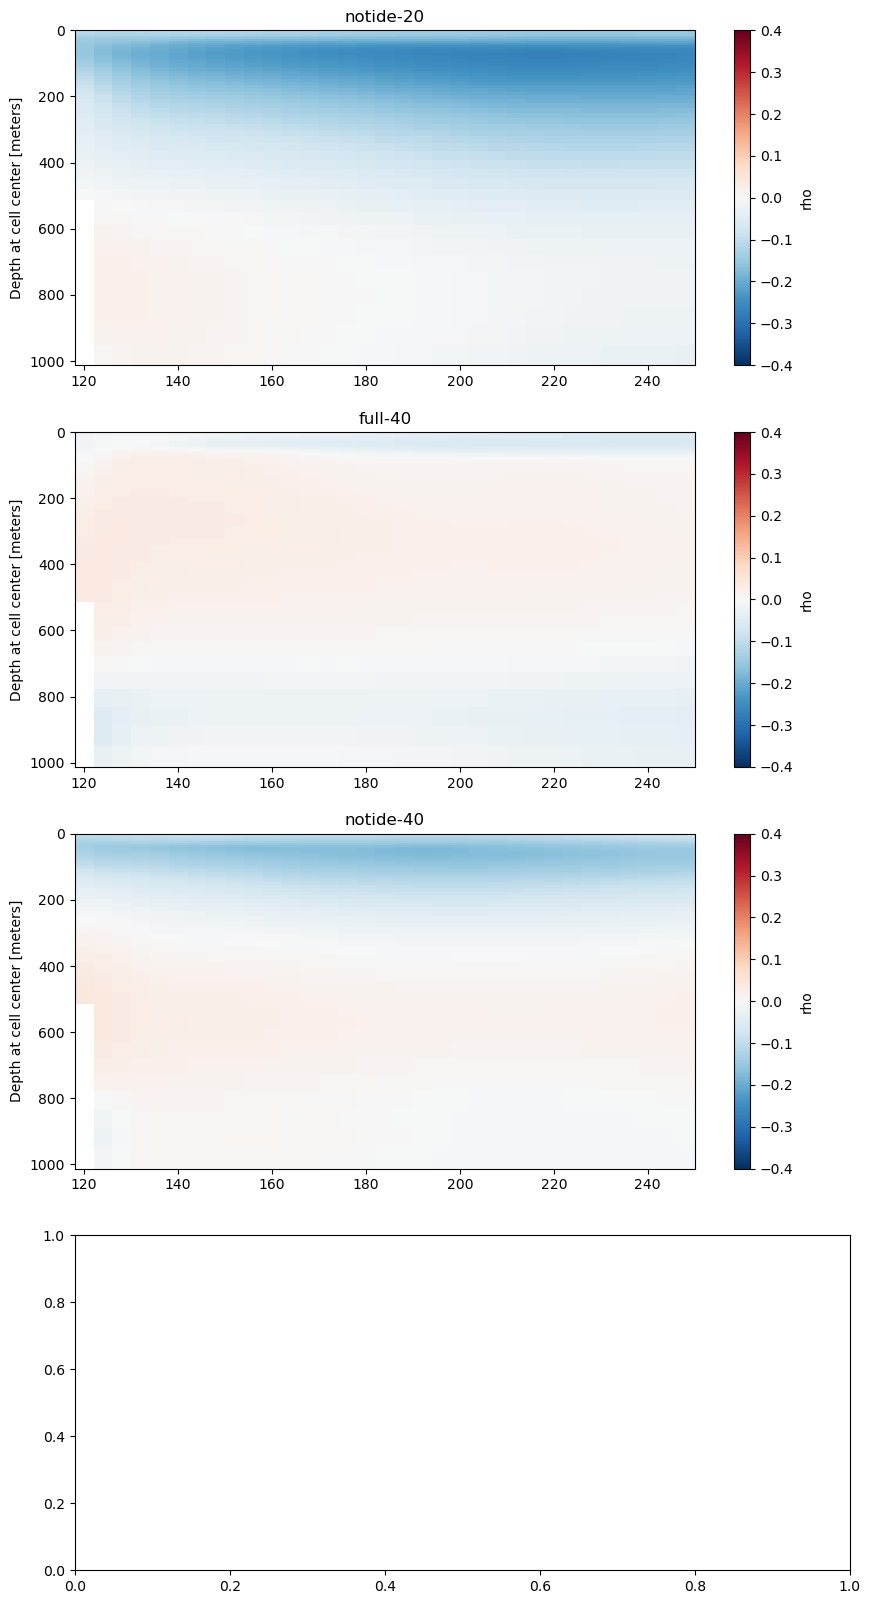

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(10, 20))

for i, expt in enumerate(["notide-20", "full-40", "notide-40"]):
    (data[expt] - data["full-20"]).rho.plot(ax=ax[i],vmin = -0.4,vmax = 0.4,cmap = "RdBu_r")
    ax[i].set_title(expt)
    ax[i].invert_yaxis()
    ax[i].set_xlabel("")


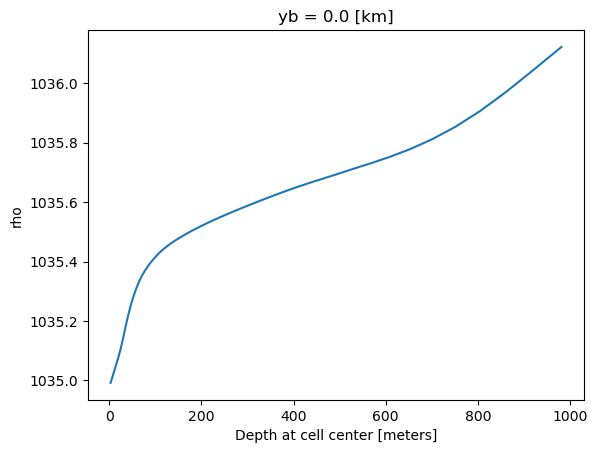

In [ ]:
full20.rho.mean("xb").plot()

In [3]:
bathy = tt.collect_data("full-20",rawdata = ["rho"],timerange = (100,150)).sel(xb = slice(0,200)).bathy

loading rho...	done.


In [41]:
## Load density data for near the shelf

full40 = tt.collect_data(
    "full-40",
    rawdata = ["rho"],
    timerange = (10000,20000)
).sel(xb = slice(120,200),zl = slice(0,1000)).sel(yb = 0,method = "nearest").load()
notide40 = tt.collect_data(
    "notide-40",
    rawdata = ["rho"],
    timerange = (10000,20000)
).sel(xb = slice(120,200),zl = slice(0,1000)).sel(yb = 0,method = "nearest").load()




loading rho...	

Exception ignored in: <function CachingFileManager.__del__ at 0x154a26969f30>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x1468520c1e10>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__

done.
loading rho...	

Exception ignored in: <function CachingFileManager.__del__ at 0x1468520c1e10>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__
    self.close(needs_lock=False)
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 234, in close
    file.close()
  File "src/netCDF4/_netCDF4.pyx", line 2627, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2590, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2034, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: Not a valid ID
Exception ignored in: <function CachingFileManager.__del__ at 0x154a26969f30>
Traceback (most recent call last):
  File "/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/xarray/backends/file_manager.py", line 250, in __del__

done.


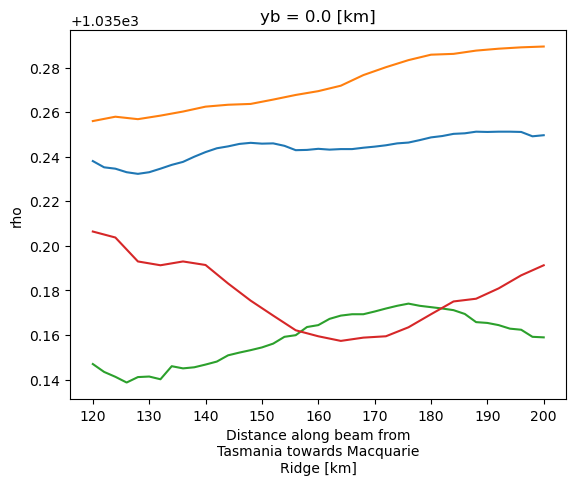

In [42]:
(full40.isel(zl = slice(0,20)).mean("zl").rho).mean("time").plot()
(full20.isel(zl = slice(0,20)).mean("zl").rho).mean("time").plot()
# (smooth20.isel(zl = slice(0,20)).mean("zl").rho).mean("time").plot()
(notide40.isel(zl = slice(0,20)).mean("zl").rho).mean("time").plot()
(notide20.isel(zl = slice(0,20)).mean("zl").rho).mean("time").plot()

(75.0, 210.0)

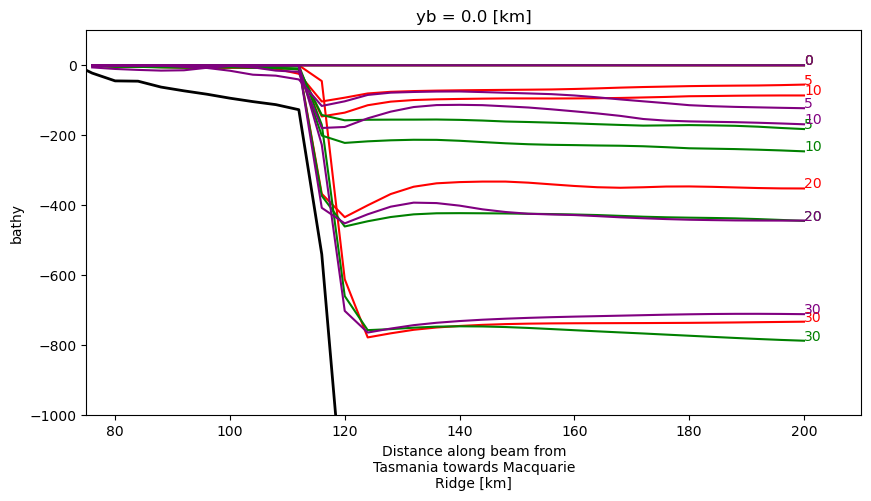

In [26]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

isopycnals = [0,5,10,20,30]

for i in isopycnals:
    full20.e.isel(rho2_i = i).mean("time").plot(ax = ax, color = "red")
    ax.text(full20.xb.values[-1], full20.e.isel(rho2_i = i).mean("time").values[-1], f'{i}', color="red")
for i in isopycnals:
    notide20.e.isel(rho2_i = i).mean("time").plot(ax = ax,color = "green")
    ax.text(full20.xb.values[-1], notide20.e.isel(rho2_i = i).mean("time").values[-1], f'{i}', color="green")
for i in isopycnals:
    smooth20.e.isel(rho2_i = i).mean("time").plot(ax = ax,color = "purple")
    ax.text(full20.xb.values[-1], smooth20.e.isel(rho2_i = i).mean("time").values[-1], f'{i}', color="purple")

bathy.sel(yb = 0,method = "nearest").plot(ax = ax,color = "black",linewidth = 2)
ax.set_ylim(-1000,100)
ax.set_xlim(75,None)

(75.0, 210.0)

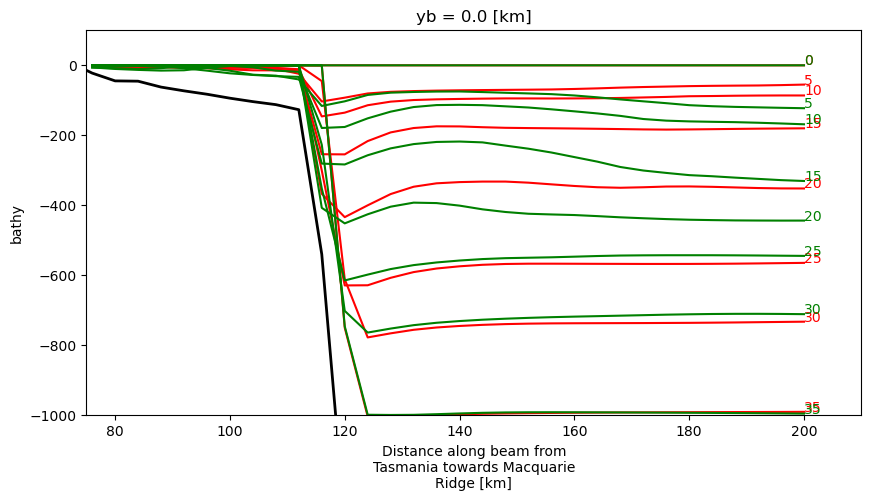

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

for i in range(0,40,5):
    full20.e.isel(rho2_i = i).mean("time").plot(ax = ax, color = "red")
    ax.text(full20.xb.values[-1], full20.e.isel(rho2_i = i).mean("time").values[-1], f'{i}', color="red")
for i in range(0,40,5):
    smooth20.e.isel(rho2_i = i).mean("time").plot(ax = ax,color = "green")
    ax.text(full20.xb.values[-1], smooth20.e.isel(rho2_i = i).mean("time").values[-1], f'{i}', color="green")

bathy.sel(yb = 0,method = "nearest").plot(ax = ax,color = "black",linewidth = 2)
ax.set_ylim(-1000,100)
ax.set_xlim(75,None)